In [1]:
import numpy as np 
from BFEE2.postTreatment import postTreatment
from BFEE2.commonTools.ploter import mergePMF, writePMF
import math
import plumed
import matplotlib.pyplot as plt
from jinja2 import Template

In [12]:

TEMPERATURE = 300 # k
BOLTZMANN = 0.0019872041 # kacl/mol 
beta =  1 / (BOLTZMANN * TEMPERATURE)
forceConstantPolarTheta = 0.1
forceConstantPolarPhi = 0.1 
unit = 'namd'
rStar = 30.5

In [13]:
data = plumed.read_as_pandas("../../OpenMM_BFEE2/openmm_plumed/005_PolarTheta/fes.dat")
pmfs_polartheta = np.array([data["polarTheta"], data["file.free"]/4.184])
data = plumed.read_as_pandas("../../OpenMM_BFEE2/openmm_plumed/006_PolarPhi/fes.dat")
pmfs_polarphi = np.array([data["polarPhi"], data["file.free"]/4.184])
data = plumed.read_as_pandas("../../OpenMM_BFEE2/openmm_plumed/007_r/fes.dat")
pmfs = np.array([data["r"]*10, data["file.free"]/4.184])

for i in range(len(pmfs[0])):
    pmfs[1][i] += 2 * BOLTZMANN * TEMPERATURE * math.log(pmfs[0][i])

pmfs[1] -= np.min(pmfs[1])

ps = postTreatment(TEMPERATURE, unit, jobType='geometric') 

dG = ps._geometricCalculateSI(rStar, pmfs, pmfs_polartheta[0][np.argmin(pmfs_polartheta[1])], pmfs_polarphi[0][np.argmin(pmfs_polarphi[1])], forceConstantPolarTheta, forceConstantPolarPhi)

print(f'dG = {dG:.3f} kcal/mol')

dG = -14.230 kcal/mol


/tmp/ipykernel_62348/1436400766.py:1: UserWarning: cannot load PLUMED instance, conversions will not be available
  data = plumed.read_as_pandas("../../OpenMM_BFEE2/openmm_plumed/005_PolarTheta/fes.dat")
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/ndonyapour/miniconda3/envs/bfee2/lib/libplumedKernel.so" +++
+++ File /home/ndonyapour/miniconda3/envs/bfee2/lib/libplumedKernel.so does not exist or cannot be read
/tmp/ipykernel_62348/1436400766.py:3: UserWarning: cannot load PLUMED instance, conversions will not be available
  data = plumed.read_as_pandas("../../OpenMM_BFEE2/openmm_plumed/006_PolarPhi/fes.dat")
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/ndonyapour/miniconda3/envs/bfee2/lib/libplumedKernel.so" +++
+++ File /home/ndonyapour/miniconda3/envs/bfee2/lib/libplumedKernel.so does not exist or cannot be read
/tmp/ipykernel_62348/1436400766.py:5: UserWarning: cannot load PLUMED instance, conversions will not be available
  data = plumed.

/tmp/ipykernel_62348/467504569.py:1: UserWarning: cannot load PLUMED instance, conversions will not be available
  data = plumed.read_as_pandas("../../OpenMM_BFEE2/openmm_plumed/007_r/fes.dat")
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/ndonyapour/miniconda3/envs/bfee2/lib/libplumedKernel.so" +++
+++ File /home/ndonyapour/miniconda3/envs/bfee2/lib/libplumedKernel.so does not exist or cannot be read


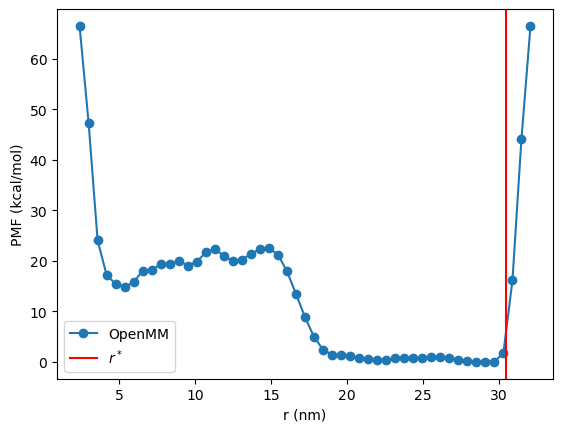

In [14]:

data = plumed.read_as_pandas("../../OpenMM_BFEE2/openmm_plumed/007_r/fes.dat")
pmf_op = np.array([data["r"]*10, data["file.free"]/4.184])
plt.plot(*pmf_op, "o-", label="OpenMM")
plt.axvline(x = 30.5 , color = 'r', label = r'$r^*$')
plt.ylabel("PMF (kcal/mol)")
plt.xlabel("r (nm)")
plt.legend(loc="best")
plt.savefig('figures/r_OpenMM_pmf_r*.png')


/tmp/ipykernel_62348/1620631387.py:9: UserWarning: cannot load PLUMED instance, conversions will not be available
  data = plumed.read_as_pandas(f"../../OpenMM_BFEE2/openmm_plumed/007_r/fes_stride.dat{i}.dat")
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/ndonyapour/miniconda3/envs/bfee2/lib/libplumedKernel.so" +++
+++ File /home/ndonyapour/miniconda3/envs/bfee2/lib/libplumedKernel.so does not exist or cannot be read
/tmp/ipykernel_62348/1620631387.py:9: UserWarning: cannot load PLUMED instance, conversions will not be available
  data = plumed.read_as_pandas(f"../../OpenMM_BFEE2/openmm_plumed/007_r/fes_stride.dat{i}.dat")
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/ndonyapour/miniconda3/envs/bfee2/lib/libplumedKernel.so" +++
+++ File /home/ndonyapour/miniconda3/envs/bfee2/lib/libplumedKernel.so does not exist or cannot be read
/tmp/ipykernel_62348/1620631387.py:9: UserWarning: cannot load PLUMED instance, conversions will not be available
  

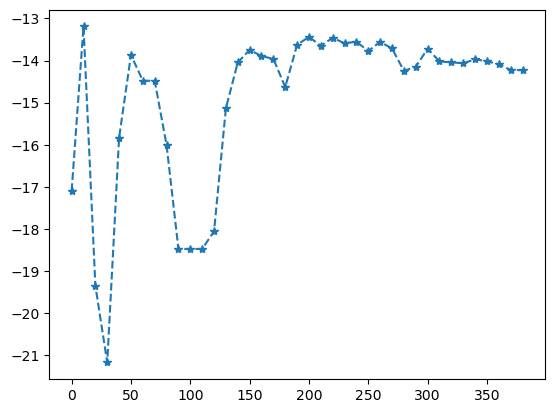

In [17]:
# convergence of dG
# plumed sum_hills --hills HILLS --bin 50 --kt 2.49 --outfile fes_stride.dat --stride 10000

num_fes = 39
dGs = []

ps = postTreatment(TEMPERATURE, unit, jobType='geometric') 
for i in range(num_fes):
    data = plumed.read_as_pandas(f"../../OpenMM_BFEE2/openmm_plumed/007_r/fes_stride.dat{i}.dat")
    pmfs = np.array([data["r"]*10, data["file.free"]/4.184])

    for i in range(len(pmfs[0])):
        pmfs[1][i] += 2 * BOLTZMANN * TEMPERATURE * math.log(pmfs[0][i])

    pmfs[1] -= np.min(pmfs[1])


    dG = ps._geometricCalculateSI(rStar, pmfs, pmfs_polartheta[0][np.argmin(pmfs_polartheta[1])], 
                                  pmfs_polarphi[0][np.argmin(pmfs_polarphi[1])], forceConstantPolarTheta, forceConstantPolarPhi)

    dGs.append(dG)


plt.plot(np.arange(len(dGs))*10, dGs, '--*')


    